In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hints:

# df.sample(frac=0.5) - it will get only 50% of the data

#Read the dataset into Pandas
df = pd.read_csv("US_Accidents_Dec19_Low.csv")
#df.head()

#pd.set_option('display.max_columns', None)
#movies.head()

df.dropna(how='all', inplace=True) # if any of the columns has all NAN values, the column will be dropped

cols = df.columns
cols

#df["column_name"].isnull().sum()

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [2]:
# Check to see if any of the columns have null/missing values and determine the best strategy for cleaning up the data (including not doing anything)

# df.isnull().values.any()
# df.isnull().sum().sum()

na_cols = []

for col in cols:
    na = df[col].isnull().sum()
    #print(col, na)
    if na != 0:
        na_cols.append(col)
        
print(na_cols) # prints all the column names that have NAN values

['TMC', 'End_Lat', 'End_Lng', 'Number', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [3]:
# Removing columns we don't need

shoo = ['TMC', 'End_Lat', 'End_Lng', 'Number', 'Street', 'Side', 'County', 'Country',
       'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Chill(F)',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Description', 'Source', 'Distance(mi)', 'Turning_Loop']

#df.Turning_Loop.value_counts()

df_clean = df.drop(shoo, axis=1)

df_clean

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Temperature(F),Humidity(%),...,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
0,A-600823,2,2019-10-21 15:39:16,2019-10-21 17:16:33,34.518951,-81.998627,Laurens,SC,72.0,73.0,...,False,False,False,False,False,False,False,False,False,False
1,A-1193367,2,2019-01-25 12:21:45,2019-01-25 12:51:36,35.880100,-78.573288,Raleigh,NC,45.0,42.0,...,False,False,False,False,False,False,False,True,False,True
2,A-2146120,2,2017-09-15 06:59:08,2017-09-15 07:28:50,34.062878,-117.488853,Fontana,CA,64.0,75.0,...,False,False,False,False,False,False,False,False,False,True
3,A-1945903,2,2017-12-07 14:07:16,2017-12-07 14:36:46,38.865753,-77.150826,Falls Church,VA,48.9,32.0,...,True,False,False,False,False,False,False,False,False,True
4,A-1937897,2,2017-12-04 09:01:09,2017-12-04 09:45:53,35.742931,-78.680969,Raleigh,NC,41.0,96.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148712,A-2361503,3,2016-12-22 17:41:58,2016-12-22 23:41:58,34.170880,-118.574320,Woodland Hills,CA,57.9,87.0,...,False,False,True,False,False,False,False,False,False,False
148713,A-2533084,2,2019-10-09 20:08:00,2019-10-09 21:01:10,34.087198,-118.234118,Los Angeles,CA,67.0,70.0,...,False,False,False,False,False,False,False,False,False,False
148714,A-1840161,2,2018-02-12 07:20:45,2018-02-12 07:49:43,44.742294,-92.852562,Hastings,MN,1.9,69.0,...,False,False,False,False,False,False,False,False,False,True
148715,A-551055,3,2019-12-15 12:59:11,2019-12-15 14:28:48,32.759766,-97.215096,Fort Worth,TX,68.0,50.0,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# Find the state that has the most accidents
import numpy as np

unique, counts = np.unique(df_clean["State"], return_counts=True)
#print(unique, counts)

index = np.argmax(counts)
#print(index)

print(unique[index], counts[index])

# prolly not the right method above but it works

CA 32889


In [5]:
#by_state = df.groupby("State")
#by_state.groups
#by_state["State"].count().max()

print(df_clean.State.value_counts().head(1))

CA    32889
Name: State, dtype: int64


In [6]:
# Find the state that has the most number of most severe accidents

sev = df_clean.groupby(["State","Severity"]).size().unstack()
most_sev = sev.sort_values(by=[4],ascending=False).head(1)
print(most_sev)

Severity    1       2       3      4
State                               
FL        4.0  7315.0  3656.0  383.0


In [7]:
df_clean.Start_Time = pd.to_datetime(df_clean.Start_Time)
df_clean.End_Time = pd.to_datetime(df_clean.End_Time)

df_clean["Start_Date"] = df_clean["Start_Time"].dt.date
df_clean["End_Date"] = df_clean["End_Time"].dt.date
df_clean["Year"] = df_clean["Start_Time"].dt.year
df_clean["Month"] = df_clean["Start_Time"].dt.month
df_clean["Day"] = df_clean["Start_Time"].dt.day
df_clean["Hour"] = df_clean["Start_Time"].dt.hour

df_clean

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Temperature(F),Humidity(%),...,Station,Stop,Traffic_Calming,Traffic_Signal,Start_Date,End_Date,Year,Month,Day,Hour
0,A-600823,2,2019-10-21 15:39:16,2019-10-21 17:16:33,34.518951,-81.998627,Laurens,SC,72.0,73.0,...,False,False,False,False,2019-10-21,2019-10-21,2019,10,21,15
1,A-1193367,2,2019-01-25 12:21:45,2019-01-25 12:51:36,35.880100,-78.573288,Raleigh,NC,45.0,42.0,...,False,True,False,True,2019-01-25,2019-01-25,2019,1,25,12
2,A-2146120,2,2017-09-15 06:59:08,2017-09-15 07:28:50,34.062878,-117.488853,Fontana,CA,64.0,75.0,...,False,False,False,True,2017-09-15,2017-09-15,2017,9,15,6
3,A-1945903,2,2017-12-07 14:07:16,2017-12-07 14:36:46,38.865753,-77.150826,Falls Church,VA,48.9,32.0,...,False,False,False,True,2017-12-07,2017-12-07,2017,12,7,14
4,A-1937897,2,2017-12-04 09:01:09,2017-12-04 09:45:53,35.742931,-78.680969,Raleigh,NC,41.0,96.0,...,False,False,False,False,2017-12-04,2017-12-04,2017,12,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148712,A-2361503,3,2016-12-22 17:41:58,2016-12-22 23:41:58,34.170880,-118.574320,Woodland Hills,CA,57.9,87.0,...,False,False,False,False,2016-12-22,2016-12-22,2016,12,22,17
148713,A-2533084,2,2019-10-09 20:08:00,2019-10-09 21:01:10,34.087198,-118.234118,Los Angeles,CA,67.0,70.0,...,False,False,False,False,2019-10-09,2019-10-09,2019,10,9,20
148714,A-1840161,2,2018-02-12 07:20:45,2018-02-12 07:49:43,44.742294,-92.852562,Hastings,MN,1.9,69.0,...,False,False,False,True,2018-02-12,2018-02-12,2018,2,12,7
148715,A-551055,3,2019-12-15 12:59:11,2019-12-15 14:28:48,32.759766,-97.215096,Fort Worth,TX,68.0,50.0,...,False,False,False,False,2019-12-15,2019-12-15,2019,12,15,12


In [8]:
# Find the most common hour at which accidents have occurred

#df_clean.head()

df_clean.Hour.value_counts().head(1)

8    14193
Name: Hour, dtype: int64

In [9]:
# Find the average duration of an accident

df_clean["Duration"] = df_clean.End_Time - df_clean.Start_Time

avg = df_clean["Duration"].mean().round(freq='S')
print(avg)

0 days 01:52:17


In [10]:
# Find the average number of yearly accidents per city

#df_clean.groupby(["City","Year"]).size().unstack()

df_clean.groupby(["Year","City"]).size().groupby(["City"]).mean()

City
Abbeville        4.00
Abbott           2.00
Abbottstown      3.00
Aberdeen         6.25
Abingdon         4.25
                 ... 
Zimmerman        2.00
Zion             5.25
Zionsville       5.00
Zolfo Springs    1.00
Zumbrota         3.00
Length: 6400, dtype: float64

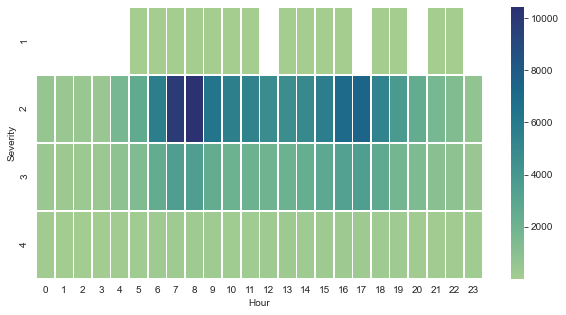

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Severity,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,1.0,...,3.0,2.0,2.0,NaN,5.0,2.0,NaN,3.0,2.0,NaN
2,581.0,439.0,480.0,441.0,1680.0,2652.0,5743.0,9861.0,10428.0,6323.0,...,4960.0,5685.0,7018.0,7409.0,5363.0,3795.0,2513.0,1699.0,1344.0,719.0
3,401.0,311.0,327.0,379.0,879.0,1351.0,2522.0,3541.0,3527.0,2493.0,...,2386.0,2772.0,3340.0,3504.0,2705.0,1832.0,1387.0,1036.0,847.0,443.0
4,163.0,117.0,107.0,121.0,139.0,195.0,224.0,218.0,235.0,229.0,...,222.0,250.0,267.0,278.0,222.0,211.0,152.0,135.0,158.0,169.0


In [77]:
# Examine the relationship between accident severity and other accident information such as time, weather and location

sev_per_hour = df_clean.groupby(["Severity","Hour"]).size().unstack()

plt.figure(figsize=[10,5])
sns.heatmap(sev_per_hour, linewidths=0.5, cmap="crest")
plt.show()

sev_per_hour

#Most accidents occur during the morning rush hour with level 2 severity.
#Most severe accidents (level 4) occur equally throughout the day.

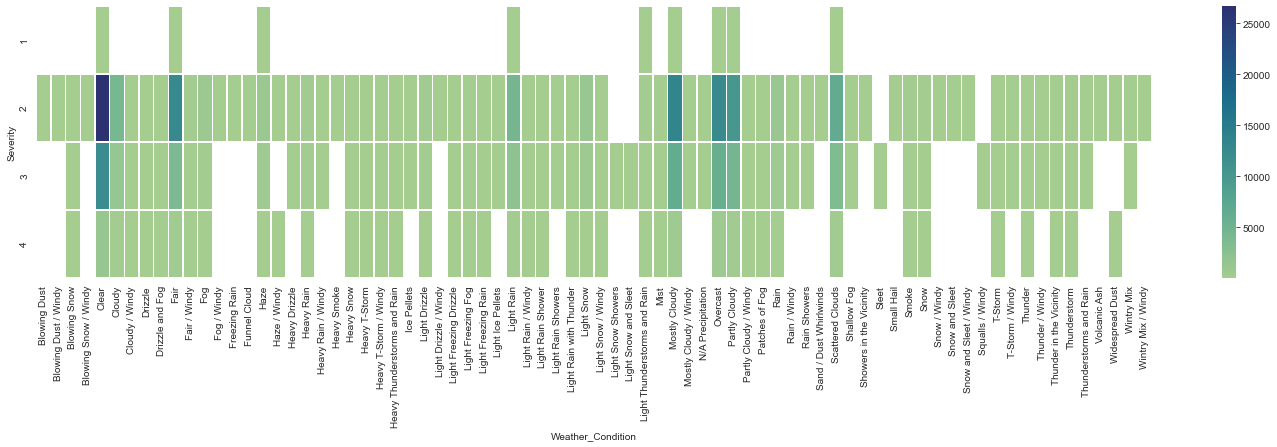

Weather_Condition,Blowing Dust,Blowing Dust / Windy,Blowing Snow,Blowing Snow / Windy,Clear,Cloudy,Cloudy / Windy,Drizzle,Drizzle and Fog,Fair,...,T-Storm / Windy,Thunder,Thunder / Windy,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Volcanic Ash,Widespread Dust,Wintry Mix,Wintry Mix / Windy
Severity,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,3.0,9.0,1.0,26657.0,4186.0,71.0,64.0,3.0,12647.0,...,3.0,47.0,2.0,63.0,141.0,66.0,1.0,5.0,39.0,2.0
3,NaN,NaN,7.0,NaN,12120.0,1400.0,33.0,29.0,2.0,3720.0,...,1.0,35.0,2.0,36.0,93.0,57.0,NaN,NaN,10.0,NaN
4,NaN,NaN,1.0,NaN,1343.0,189.0,4.0,7.0,1.0,508.0,...,NaN,6.0,NaN,8.0,7.0,NaN,NaN,1.0,NaN,NaN


In [85]:
sev_per_weather = df_clean.groupby(["Severity","Weather_Condition"]).size().unstack()

plt.figure(figsize=[25,5])
sns.heatmap(sev_per_weather, linewidths=0.5, cmap="crest")
plt.show()

sev_per_weather

#Most accidents occured during clear weather

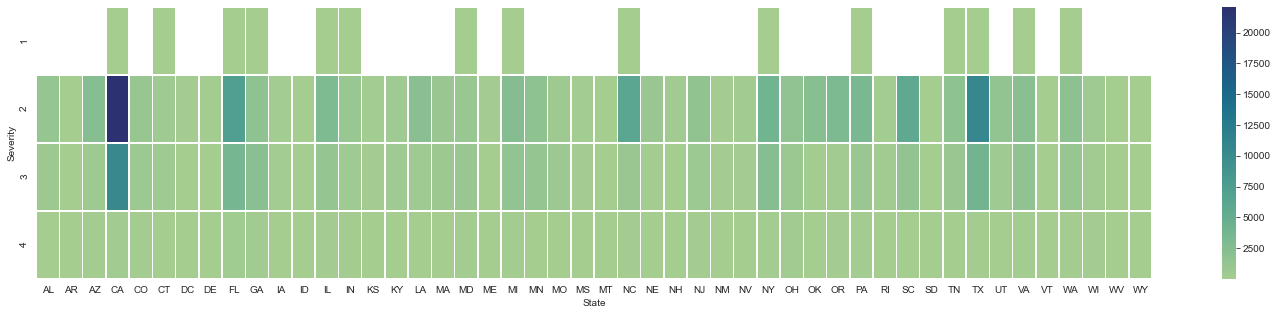

State,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Severity,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,9.0,NaN,2.0,NaN,NaN,4.0,2.0,...,NaN,1.0,7.0,NaN,1.0,NaN,4.0,NaN,NaN,NaN
2,1230.0,39.0,2389.0,22086.0,1107.0,506.0,124.0,181.0,7315.0,1796.0,...,1.0,1836.0,10570.0,1471.0,2117.0,17.0,1916.0,458.0,71.0,12.0
3,640.0,26.0,597.0,10489.0,748.0,482.0,51.0,24.0,3656.0,2112.0,...,1.0,932.0,4020.0,469.0,1643.0,3.0,1120.0,297.0,27.0,6.0
4,23.0,19.0,161.0,305.0,152.0,87.0,23.0,24.0,383.0,333.0,...,1.0,81.0,172.0,78.0,254.0,3.0,125.0,111.0,29.0,9.0


In [88]:
sev_per_state = df_clean.groupby(["Severity","State"]).size().unstack()

plt.figure(figsize=[25,5])
sns.heatmap(sev_per_state, linewidths=0.5, cmap="crest")
plt.show()

sev_per_state

#California in the strong lead with level 2 accidents, also not really shy with level 3 accidents

In [15]:
# Create state-wise visualizations of multiple data points

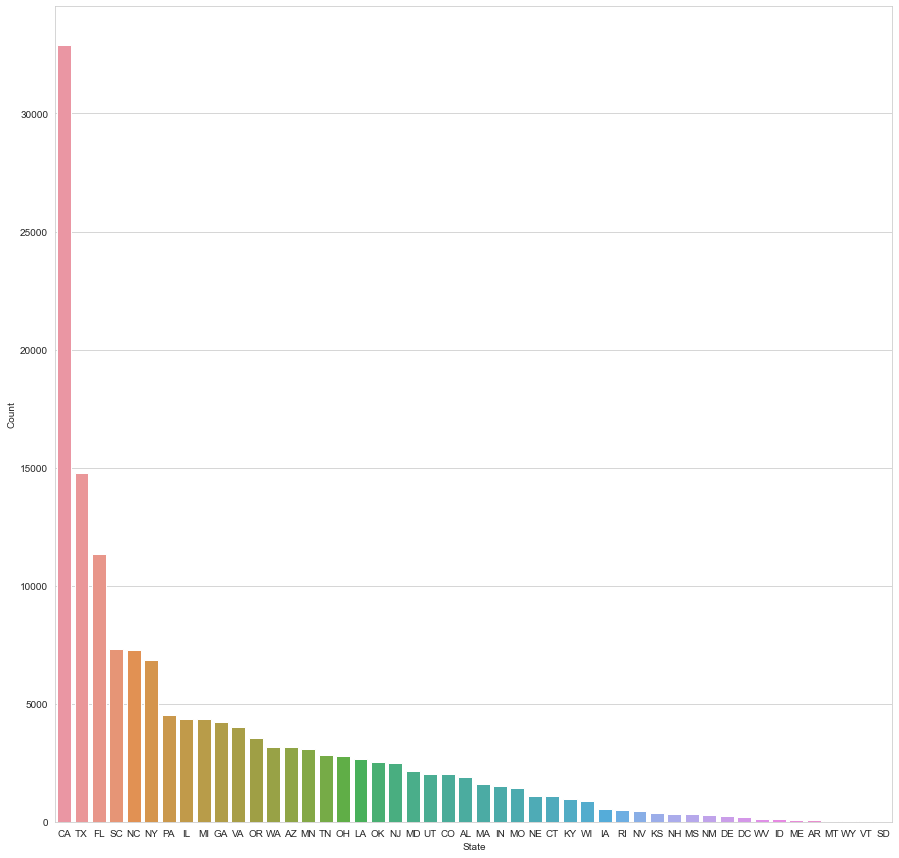

In [20]:
#Bar chart of accidents per state organized from most to least
acc_per_state = df_clean.groupby(["State"]).agg(Count = ('ID','count')).reset_index().sort_values("Count", ascending = False)
plt.subplots(figsize=(15,15))
sns.barplot(x="State", y="Count", data=acc_per_state)
plt.show()

#California is a strong leader, however, this could be do tho the fact that we're using the file with only 30% of the data.

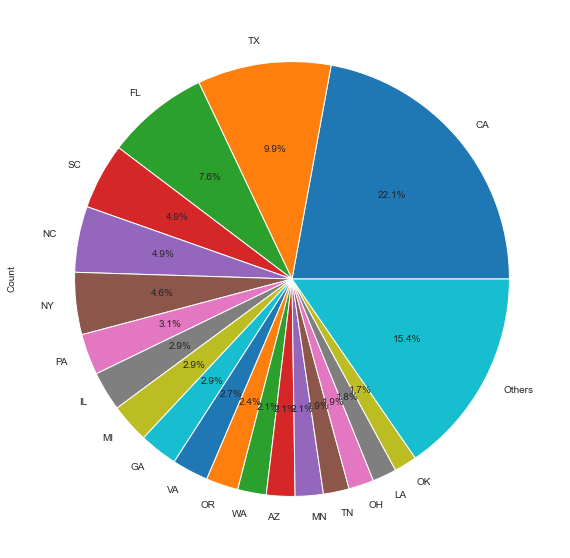

In [19]:
#Pie chart of accidents per state in percent
others = pd.DataFrame(data = {"State": ["Others"], "Count": [acc_per_state["Count"][19:].sum()]})
df_try = pd.concat([acc_per_state[:19], others])
df_try

plt.figure(figsize=[10,10])
df_try["Count"].plot.pie(autopct="%.1f%%", y = 'Count', labels = df_try['State'])
plt.show()

#California is a strong leader with 22.1% of all accidents, followed by Texas with 9.9%
#California has a higher percantage of accidents than the entire lower half of the states combined (Others)

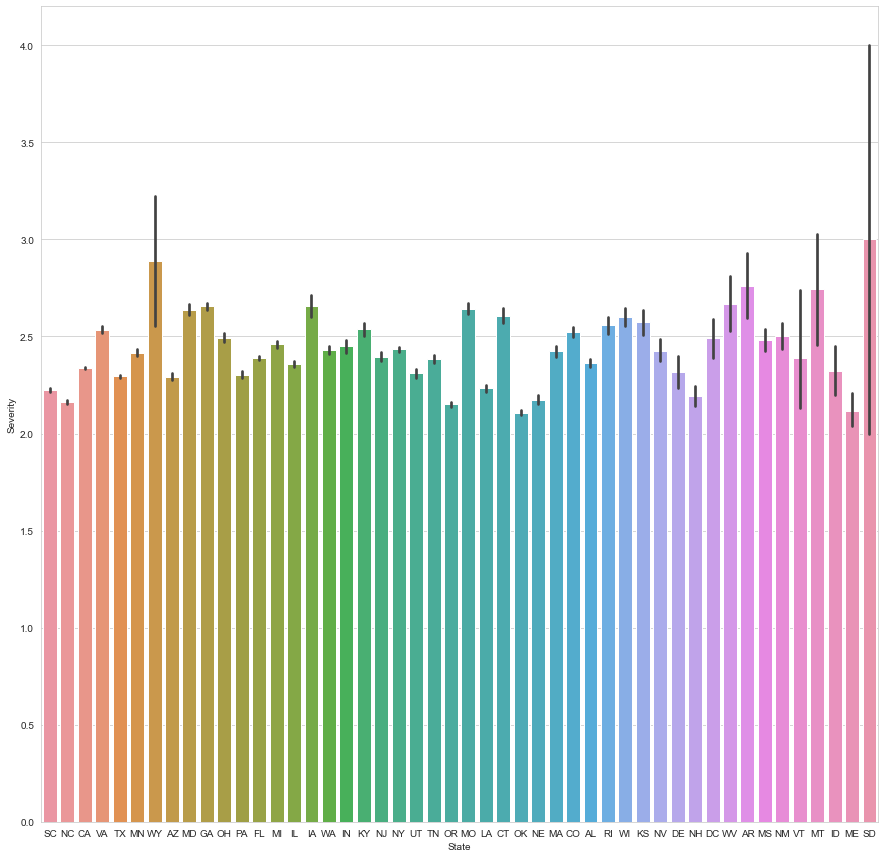

In [29]:
# Average severity per state
sns.set_style("whitegrid")
plt.subplots(figsize=(15,15))
sns.barplot(x="State", y="Severity", data=df_clean)
plt.show()

#Interesting enough, the state with least ammount of accidents (South Dakota), seems to have the most severe ones.
#SD is followed by Wyoming which is also one of the states with fewest amount of accidents.
#California being the state with most accidents, however, has an average Severity below 2.5.

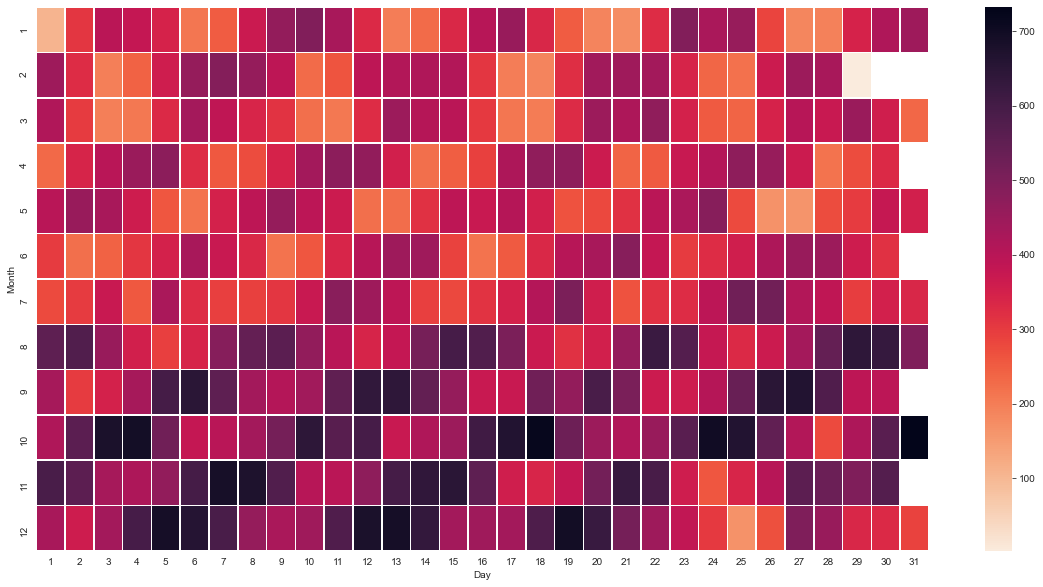

In [63]:
#Accidents per day of the month
acc_per_day = df_clean.groupby(["Month","Day"]).size().unstack()

plt.figure(figsize=[20,10])
sns.heatmap(acc_per_day, linewidths=0.5, cmap="rocket_r")
plt.show()

#More accidents occur in the 2nd half of the year than the first half

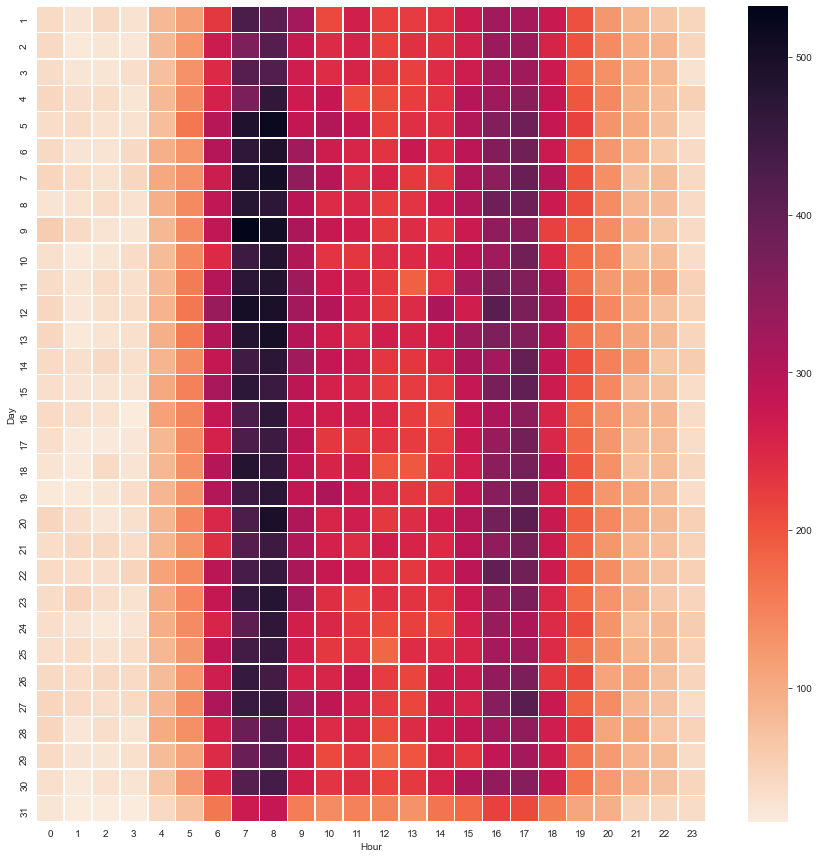

In [67]:
#Accidents per hour of the day
acc_per_hour = df_clean.groupby(["Day","Hour"]).size().unstack()

plt.figure(figsize=[15,15])
sns.heatmap(acc_per_hour, linewidths=0.5, cmap="rocket_r")
plt.show()

#Most accidents occur during the morning rush hour. There's also an increase in the afternoon rush hour.